In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [5]:
df.drop(['salary','salary_currency'],axis=1,inplace=True)

In [6]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [7]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


In [9]:
for i in df.select_dtypes(include=[object]).columns:
    print(f"{i} --->  {df[i].nunique()}")

experience_level --->  4
employment_type --->  4
job_title --->  50
employee_residence --->  57
company_location --->  50
company_size --->  3


## EDA


In [10]:
df.groupby('job_title').median()['salary_in_usd'].sort_values(ascending=False)

job_title
Data Analytics Lead                         405000.0
Financial Data Analyst                      275000.0
Head of Data                                200000.0
Principal Data Engineer                     200000.0
Data Architect                              180000.0
Analytics Engineer                          179850.0
Principal Data Scientist                    173762.0
Director of Data Science                    168000.0
Data Specialist                             165000.0
Applied Data Scientist                      157000.0
Director of Data Engineering                156738.0
Machine Learning Scientist                  156500.0
Data Science Manager                        155750.0
Data Engineering Manager                    150000.0
Head of Data Science                        138937.5
Cloud Data Engineer                         124647.0
Principal Data Analyst                      122500.0
Lead Data Engineer                          121593.5
Data Analytics Manager              

In [11]:
df.groupby('job_title').median()['salary_in_usd'].sort_values(ascending=False)

job_title
Data Analytics Lead                         405000.0
Financial Data Analyst                      275000.0
Head of Data                                200000.0
Principal Data Engineer                     200000.0
Data Architect                              180000.0
Analytics Engineer                          179850.0
Principal Data Scientist                    173762.0
Director of Data Science                    168000.0
Data Specialist                             165000.0
Applied Data Scientist                      157000.0
Director of Data Engineering                156738.0
Machine Learning Scientist                  156500.0
Data Science Manager                        155750.0
Data Engineering Manager                    150000.0
Head of Data Science                        138937.5
Cloud Data Engineer                         124647.0
Principal Data Analyst                      122500.0
Lead Data Engineer                          121593.5
Data Analytics Manager              

<AxesSubplot:xlabel='job_title'>

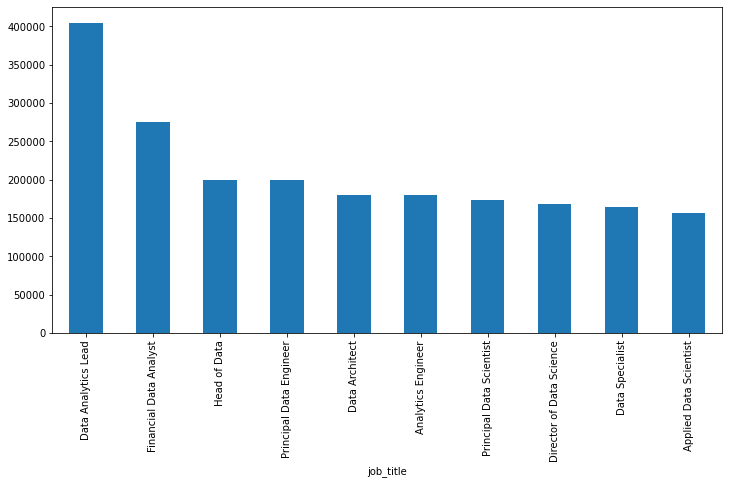

In [12]:
df.groupby('job_title').median()['salary_in_usd'].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(12,6))

In [13]:
df.groupby('company_location').median().sort_values('salary_in_usd',ascending=False).head(10)

,work_year,salary_in_usd,remote_ratio
company_location,,,
RU,2021.0,157500.0,25.0
US,2022.0,135000.0,100.0
NZ,2020.0,125000.0,50.0
IL,2021.0,119059.0,100.0
AE,2022.0,115000.0,100.0
DZ,2022.0,100000.0,50.0
IQ,2021.0,100000.0,50.0
SG,2021.0,89294.0,50.0
AU,2022.0,87425.0,100.0


<AxesSubplot:xlabel='company_location'>

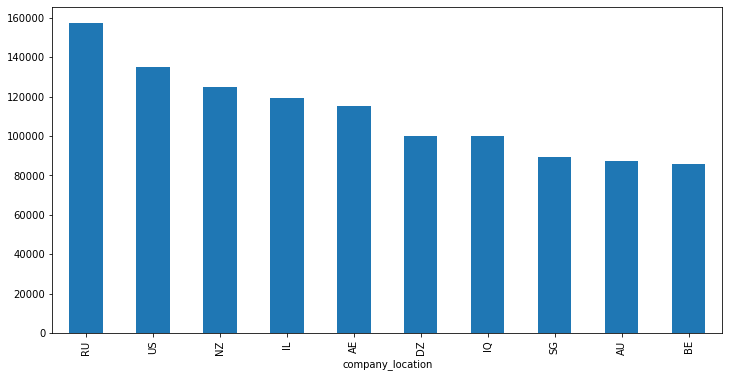

In [14]:
df.groupby('company_location').median()['salary_in_usd'].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(12,6))

### 2) Experience Level

In [15]:
df.groupby(['experience_level','company_size']).median()['salary_in_usd'].sort_values(ascending=False)

experience_level  company_size
EX                L               196979.0
                  M               171437.5
SE                L               147000.0
                  M               135500.0
EX                S               118187.0
SE                S               108603.5
MI                L                86000.0
                  M                78658.5
EN                L                63831.0
                  S                60000.0
MI                S                56738.0
EN                M                49823.0
Name: salary_in_usd, dtype: float64

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

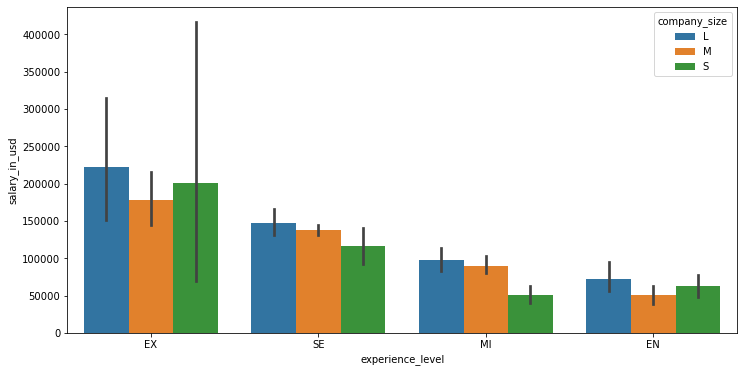

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='experience_level',y='salary_in_usd',order=['EX','SE','MI','EN'], hue='company_size',hue_order=['L','M','S'])

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

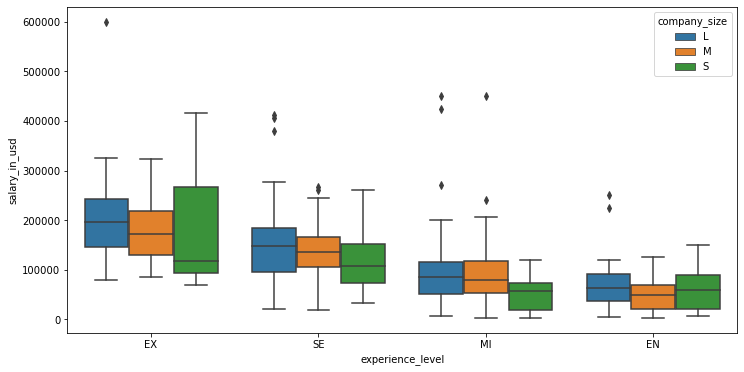

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='experience_level',y='salary_in_usd',order=['EX','SE','MI','EN'], hue='company_size',hue_order=['L','M','S'])

### Inference:
We can notice that in entry level, small campanies pay more than Medium scale companies. Also, on Executive level the pay range of small comppanies is higher than some large companies. I think that such small companies are actually not that common, and can also be vaguely classified as outliers.

### 2) Employment Type

In [18]:
df.groupby(['employment_type','company_size']).median()['salary_in_usd'].sort_values(ascending=False)

employment_type  company_size
CT               S               416000.0
                 L               185000.0
FT               M               115717.0
                 L               100800.0
                 S                69741.0
CT               M                68437.5
PT               L                62349.0
FL               S                60000.0
                 M                56000.0
                 L                20000.0
PT               S                18817.5
                 M                11177.0
Name: salary_in_usd, dtype: float64

In [19]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

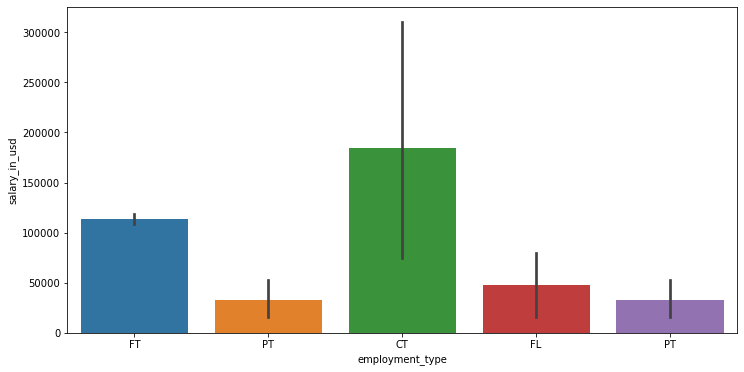

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='employment_type',y='salary_in_usd',order=['FT','PT','CT','FL','PT'])

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

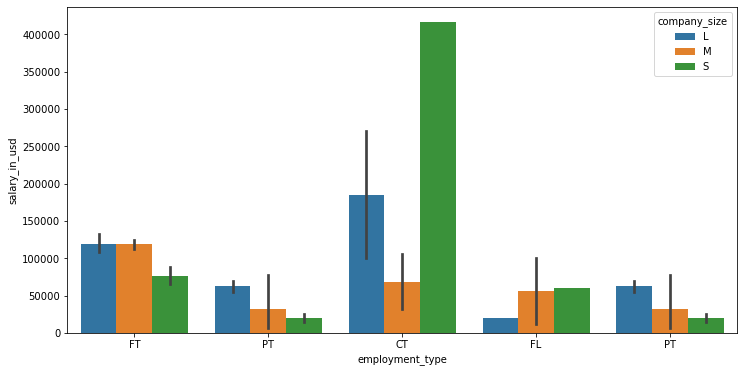

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='employment_type',y='salary_in_usd',order=['FT','PT','CT','FL','PT'], hue='company_size',hue_order=['L','M','S'])

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

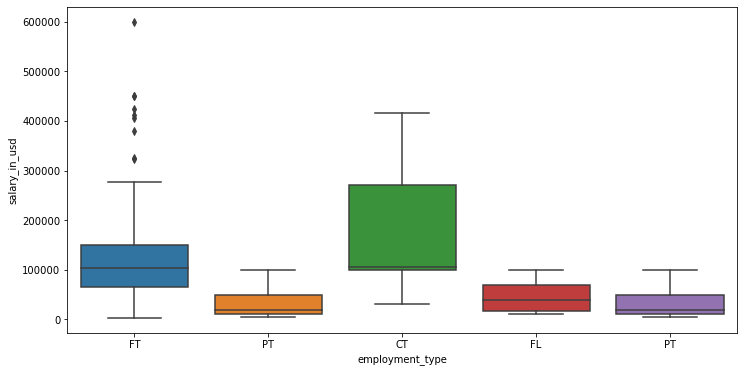

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='employment_type',y='salary_in_usd',order=['FT','PT','CT','FL','PT'])

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

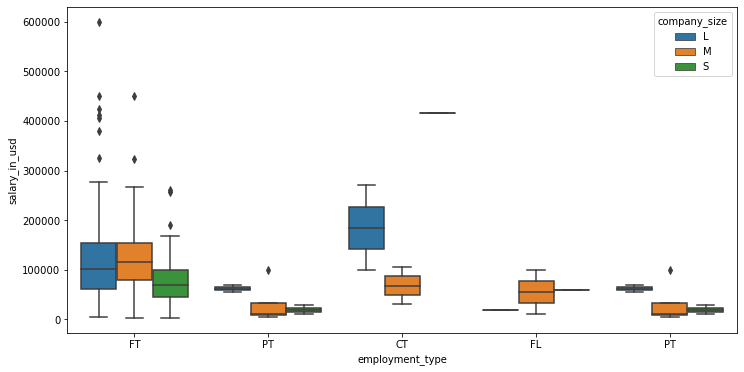

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='employment_type',y='salary_in_usd',order=['FT','PT','CT','FL','PT'], hue='company_size',hue_order=['L','M','S'])

### Inferences:
1) Contract employees are paid highest followed by Full Time, Freelance, Part time.
2) However, contract employees who are working in small companies ear way more than large or medium scale companies. For freelance, small companies pay way more than large or mid scale companies. 
3) For full time, medium companies pay more than large scale companies.

In [24]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

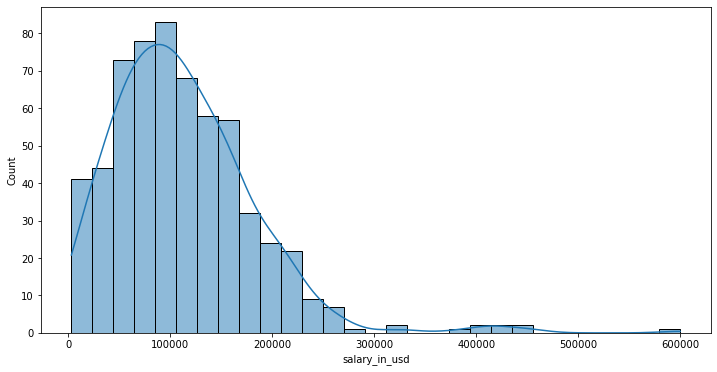

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='salary_in_usd',kde=True)

#### Right skewed

### EDA Continued on Tableau

In [26]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


In [27]:
df['remote_ratio'].unique()

array([  0,  50, 100], dtype=int64)

In [28]:
#df['remote_ratio'] = df['remote_ratio'].astype('object')

In [29]:
#df['remote_ratio'] = df['remote_ratio'].astype('object')

In [30]:
def remote_ration_converter(x):
    if x==0:
        return 'Fully Remote'
    elif x==50:
        return 'Hybrid'
    else:
        return 'On-prem'

In [31]:
df['remote_ratio'] = df['remote_ratio'].apply(lambda x: remote_ration_converter(x))

In [32]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,Fully Remote,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,Fully Remote,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,Hybrid,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,Fully Remote,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,Hybrid,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,On-prem,US,M
603,2022,SE,FT,Data Engineer,126000,US,On-prem,US,M
604,2022,SE,FT,Data Analyst,129000,US,Fully Remote,US,M
605,2022,SE,FT,Data Analyst,150000,US,On-prem,US,M


### Let's divide the samples into Tier 1,2,3,4,5 paying jobs with 5 paying higest quartile and 1 paying lowest quartile

In [33]:
df['Pay grade'] = pd.qcut(df['salary_in_usd'],q=5,labels=[1,2,3,4,5])

In [34]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Pay grade
0,2020,MI,FT,Data Scientist,79833,DE,Fully Remote,DE,L,2
1,2020,SE,FT,Machine Learning Scientist,260000,JP,Fully Remote,JP,S,5
2,2020,SE,FT,Big Data Engineer,109024,GB,Hybrid,GB,M,3
3,2020,MI,FT,Product Data Analyst,20000,HN,Fully Remote,HN,S,1
4,2020,SE,FT,Machine Learning Engineer,150000,US,Hybrid,US,L,4
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,On-prem,US,M,4
603,2022,SE,FT,Data Engineer,126000,US,On-prem,US,M,4
604,2022,SE,FT,Data Analyst,129000,US,Fully Remote,US,M,4
605,2022,SE,FT,Data Analyst,150000,US,On-prem,US,M,4


In [35]:
df.groupby('Pay grade').median()['salary_in_usd']

Pay grade
1     34699.0
2     71884.0
3    103691.0
4    140000.0
5    200000.0
Name: salary_in_usd, dtype: float64

In [36]:
len(df[df['employee_residence']==df['company_location']])

556

### Which countries work the most for foreign companies

<AxesSubplot:>

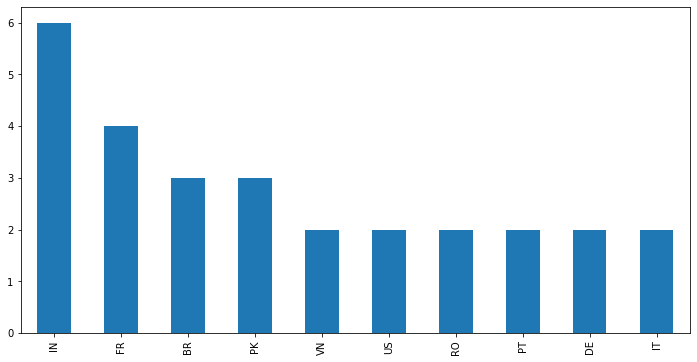

In [37]:
df[df['employee_residence']!=df['company_location']]['employee_residence'].value_counts(ascending=False).head(10).plot(kind='bar',figsize=(12,6))

### Which countries outsourced the most

<AxesSubplot:>

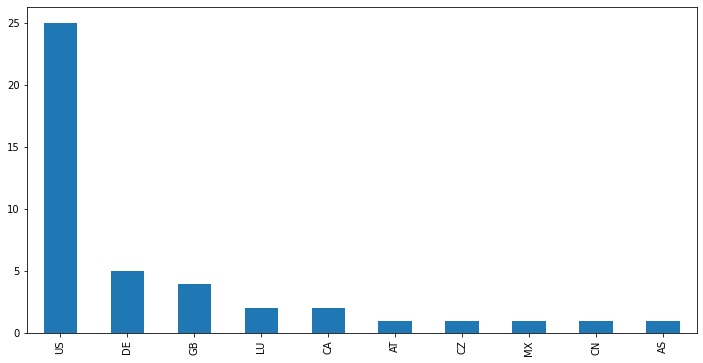

In [38]:
df[df['employee_residence']!=df['company_location']]['company_location'].value_counts(ascending=False).head(10).plot(kind='bar',figsize=(12,6))

In [39]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Pay grade
0,2020,MI,FT,Data Scientist,79833,DE,Fully Remote,DE,L,2
1,2020,SE,FT,Machine Learning Scientist,260000,JP,Fully Remote,JP,S,5
2,2020,SE,FT,Big Data Engineer,109024,GB,Hybrid,GB,M,3
3,2020,MI,FT,Product Data Analyst,20000,HN,Fully Remote,HN,S,1
4,2020,SE,FT,Machine Learning Engineer,150000,US,Hybrid,US,L,4
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,On-prem,US,M,4
603,2022,SE,FT,Data Engineer,126000,US,On-prem,US,M,4
604,2022,SE,FT,Data Analyst,129000,US,Fully Remote,US,M,4
605,2022,SE,FT,Data Analyst,150000,US,On-prem,US,M,4


In [40]:
df['company_location'].nunique()

50

#### We'll divide locations in 5 division based on based on median salary

In [41]:
df.groupby('company_location').median()['salary_in_usd'].sort_values(ascending=False).iloc[:10].index

Index(['RU', 'US', 'NZ', 'IL', 'AE', 'DZ', 'IQ', 'SG', 'AU', 'BE'], dtype='object', name='company_location')

In [42]:
df.groupby('company_location').median()['salary_in_usd'].sort_values(ascending=False).iloc[10:20].index

Index(['CA', 'GB', 'DE', 'JP', 'CN', 'IE', 'AT', 'CH', 'SI', 'RO'], dtype='object', name='company_location')

In [43]:
df.groupby('company_location').median()['salary_in_usd'].sort_values(ascending=False).iloc[20:30].index

Index(['LU', 'FR', 'PT', 'NL', 'CZ', 'GR', 'ES', 'DK', 'HR', 'PL'], dtype='object', name='company_location')

In [44]:
df.groupby('company_location').median()['salary_in_usd'].sort_values(ascending=False).iloc[30:40].index

Index(['CL', 'MY', 'IT', 'HU', 'MX', 'EE', 'NG', 'MT', 'IN', 'CO'], dtype='object', name='company_location')

In [45]:
df.groupby('company_location').median()['salary_in_usd'].sort_values(ascending=False).iloc[40:].index

Index(['TR', 'HN', 'BR', 'AS', 'MD', 'UA', 'PK', 'KE', 'IR', 'VN'], dtype='object', name='company_location')

In [46]:
def geo_region(x):
    if x in df.groupby('company_location').median()['salary_in_usd'].sort_values(ascending=False).iloc[:10].index:
        return 5
    elif x in df.groupby('company_location').median()['salary_in_usd'].sort_values(ascending=False).iloc[10:20].index:
        return 4
    elif x in df.groupby('company_location').median()['salary_in_usd'].sort_values(ascending=False).iloc[20:30].index:
        return 3
    elif x in df.groupby('company_location').median()['salary_in_usd'].sort_values(ascending=False).iloc[30:40].index:
        return 2
    else:
        return 1

In [47]:
df['company_country_pay_scale'] = df['company_location'].apply(lambda x: geo_region(x))

In [48]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Pay grade,company_country_pay_scale
0,2020,MI,FT,Data Scientist,79833,DE,Fully Remote,DE,L,2,4
1,2020,SE,FT,Machine Learning Scientist,260000,JP,Fully Remote,JP,S,5,4
2,2020,SE,FT,Big Data Engineer,109024,GB,Hybrid,GB,M,3,4
3,2020,MI,FT,Product Data Analyst,20000,HN,Fully Remote,HN,S,1,1
4,2020,SE,FT,Machine Learning Engineer,150000,US,Hybrid,US,L,4,5
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,On-prem,US,M,4,5
603,2022,SE,FT,Data Engineer,126000,US,On-prem,US,M,4,5
604,2022,SE,FT,Data Analyst,129000,US,Fully Remote,US,M,4,5
605,2022,SE,FT,Data Analyst,150000,US,On-prem,US,M,4,5


In [49]:
df2 = df.drop(['employee_residence','company_location'],axis=1)

In [50]:
df2

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Pay grade,company_country_pay_scale
0,2020,MI,FT,Data Scientist,79833,Fully Remote,L,2,4
1,2020,SE,FT,Machine Learning Scientist,260000,Fully Remote,S,5,4
2,2020,SE,FT,Big Data Engineer,109024,Hybrid,M,3,4
3,2020,MI,FT,Product Data Analyst,20000,Fully Remote,S,1,1
4,2020,SE,FT,Machine Learning Engineer,150000,Hybrid,L,4,5
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,On-prem,M,4,5
603,2022,SE,FT,Data Engineer,126000,On-prem,M,4,5
604,2022,SE,FT,Data Analyst,129000,Fully Remote,M,4,5
605,2022,SE,FT,Data Analyst,150000,On-prem,M,4,5


In [51]:
for i in df2.select_dtypes(include='object').columns:
    print(f"{i} --->  {df[i].nunique()}")

experience_level --->  4
employment_type --->  4
job_title --->  50
remote_ratio --->  3
company_size --->  3


In [52]:
df['job_title'].value_counts(ascending=False).head(20)

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
AI Scientist                    7
Data Science Consultant         7
Director of Data Science        7
Data Analytics Manager          7
ML Engineer                     6
Computer Vision Engineer        6
BI Data Analyst                 6
Lead Data Engineer              6
Data Engineering Manager        5
Business Data Analyst           5
Name: job_title, dtype: int64

In [53]:
df.groupby('job_title').median()['salary_in_usd'].sort_values(ascending=False).iloc[:10].index

Index(['Data Analytics Lead', 'Financial Data Analyst', 'Head of Data',
       'Principal Data Engineer', 'Data Architect', 'Analytics Engineer',
       'Principal Data Scientist', 'Director of Data Science',
       'Data Specialist', 'Applied Data Scientist'],
      dtype='object', name='job_title')

In [54]:
def job_pay_scale(x):
    if x in df.groupby('job_title').median()['salary_in_usd'].sort_values(ascending=False).iloc[:10].index:
        return 5
    elif x in df.groupby('job_title').median()['salary_in_usd'].sort_values(ascending=False).iloc[10:20].index:
        return 4
    elif x in df.groupby('job_title').median()['salary_in_usd'].sort_values(ascending=False).iloc[20:30].index:
        return 3
    elif x in df.groupby('job_title').median()['salary_in_usd'].sort_values(ascending=False).iloc[30:40].index:
        return 2
    else:
        return 1

In [55]:
df2['job_pay_scale'] = df['job_title'].apply(lambda x: job_pay_scale(x))

In [56]:
df2

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Pay grade,company_country_pay_scale,job_pay_scale
0,2020,MI,FT,Data Scientist,79833,Fully Remote,L,2,4,3
1,2020,SE,FT,Machine Learning Scientist,260000,Fully Remote,S,5,4,4
2,2020,SE,FT,Big Data Engineer,109024,Hybrid,M,3,4,1
3,2020,MI,FT,Product Data Analyst,20000,Fully Remote,S,1,1,1
4,2020,SE,FT,Machine Learning Engineer,150000,Hybrid,L,4,5,3
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,On-prem,M,4,5,3
603,2022,SE,FT,Data Engineer,126000,On-prem,M,4,5,3
604,2022,SE,FT,Data Analyst,129000,Fully Remote,M,4,5,3
605,2022,SE,FT,Data Analyst,150000,On-prem,M,4,5,3


In [57]:
df2.drop('job_title',axis=1,inplace=True)

In [58]:
df2

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,Pay grade,company_country_pay_scale,job_pay_scale
0,2020,MI,FT,79833,Fully Remote,L,2,4,3
1,2020,SE,FT,260000,Fully Remote,S,5,4,4
2,2020,SE,FT,109024,Hybrid,M,3,4,1
3,2020,MI,FT,20000,Fully Remote,S,1,1,1
4,2020,SE,FT,150000,Hybrid,L,4,5,3
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,154000,On-prem,M,4,5,3
603,2022,SE,FT,126000,On-prem,M,4,5,3
604,2022,SE,FT,129000,Fully Remote,M,4,5,3
605,2022,SE,FT,150000,On-prem,M,4,5,3


In [59]:
df2.groupby(['company_size','remote_ratio']).median()['salary_in_usd'].sort_values(ascending=False)

company_size  remote_ratio
M             On-prem         123000.0
L             Fully Remote    117500.0
              On-prem         112150.0
M             Fully Remote     99000.0
S             On-prem          75000.0
L             Hybrid           73171.0
S             Hybrid           64866.5
M             Hybrid           61467.0
S             Fully Remote     50294.5
Name: salary_in_usd, dtype: float64

<AxesSubplot:xlabel='remote_ratio', ylabel='salary_in_usd'>

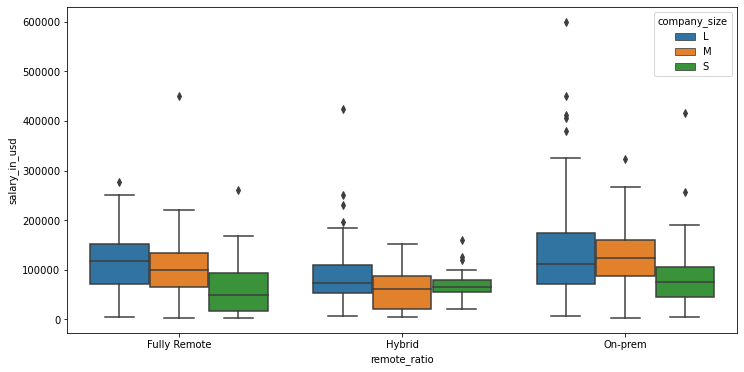

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df2,x='remote_ratio',y='salary_in_usd',hue='company_size',hue_order=['L','M','S'])

In [61]:
df3 = df2.copy()

In [62]:
df3

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,Pay grade,company_country_pay_scale,job_pay_scale
0,2020,MI,FT,79833,Fully Remote,L,2,4,3
1,2020,SE,FT,260000,Fully Remote,S,5,4,4
2,2020,SE,FT,109024,Hybrid,M,3,4,1
3,2020,MI,FT,20000,Fully Remote,S,1,1,1
4,2020,SE,FT,150000,Hybrid,L,4,5,3
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,154000,On-prem,M,4,5,3
603,2022,SE,FT,126000,On-prem,M,4,5,3
604,2022,SE,FT,129000,Fully Remote,M,4,5,3
605,2022,SE,FT,150000,On-prem,M,4,5,3


In [63]:
df.groupby('experience_level').median()['salary_in_usd'].sort_values(ascending=False)

experience_level
EX    171437.5
SE    135500.0
MI     76940.0
EN     56500.0
Name: salary_in_usd, dtype: float64

In [64]:
def exp_level_grade(x):
    if x=='EX':
        return 4
    elif x=='SE':
        return 3
    elif x=='MI':
        return 2
    else:
        return 1

In [65]:
df3['exp_level_grade'] = df3['experience_level'].apply(lambda x: exp_level_grade(x))

In [66]:
df.groupby('employment_type').median()['salary_in_usd'].sort_values(ascending=False)

employment_type
CT    105000.0
FT    104196.5
FL     40000.0
PT     18817.5
Name: salary_in_usd, dtype: float64

In [67]:
def emploment_type_grade(x):
    if x=='CT':
        return 4
    elif x=='FE':
        return 3
    elif x=='FL':
        return 2
    else:
        return 1

In [68]:
#df3['employment_type_grade'] = df3['employment_type'].apply(lambda x: emploment_type_grade(x))

In [69]:
df3.drop('experience_level',axis=1,inplace=True)

In [70]:
df3

,work_year,employment_type,salary_in_usd,remote_ratio,company_size,Pay grade,company_country_pay_scale,job_pay_scale,exp_level_grade
0,2020,FT,79833,Fully Remote,L,2,4,3,2
1,2020,FT,260000,Fully Remote,S,5,4,4,3
2,2020,FT,109024,Hybrid,M,3,4,1,3
3,2020,FT,20000,Fully Remote,S,1,1,1,2
4,2020,FT,150000,Hybrid,L,4,5,3,3
...,...,...,...,...,...,...,...,...,...
602,2022,FT,154000,On-prem,M,4,5,3,3
603,2022,FT,126000,On-prem,M,4,5,3,3
604,2022,FT,129000,Fully Remote,M,4,5,3,3
605,2022,FT,150000,On-prem,M,4,5,3,3


### Train test split

In [71]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate

In [72]:
X = df2.drop('salary_in_usd',axis=1)
y = df2['salary_in_usd']

In [73]:
cat_columns = X.select_dtypes(include='object').columns

In [74]:
cat_columns

Index(['experience_level', 'employment_type', 'remote_ratio', 'company_size'], dtype='object')

In [75]:
X = pd.get_dummies(X,columns=cat_columns)

In [76]:
X

,work_year,Pay grade,company_country_pay_scale,job_pay_scale,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,remote_ratio_Fully Remote,remote_ratio_Hybrid,remote_ratio_On-prem,company_size_L,company_size_M,company_size_S
0,2020,2,4,3,0,0,1,0,0,0,1,0,1,0,0,1,0,0
1,2020,5,4,4,0,0,0,1,0,0,1,0,1,0,0,0,0,1
2,2020,3,4,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
3,2020,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
4,2020,4,5,3,0,0,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,4,5,3,0,0,0,1,0,0,1,0,0,0,1,0,1,0
603,2022,4,5,3,0,0,0,1,0,0,1,0,0,0,1,0,1,0
604,2022,4,5,3,0,0,0,1,0,0,1,0,1,0,0,0,1,0
605,2022,4,5,3,0,0,0,1,0,0,1,0,0,0,1,0,1,0


In [77]:
X.rename(columns={'remote_ratio_Fully Remote': 'remote_ratio_Fully_Remote'},inplace=True)
X.rename(columns={'remote_ratio_On-prem': 'remote_ratio_On_prem'},inplace=True)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [81]:
#sc = StandardScaler()

In [82]:
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

### Model Building
#### 1) Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rf = RandomForestRegressor(random_state=42)

In [85]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [86]:
print(mean_squared_error(y_test,rf.predict(X_test))**0.5)

29859.09587806257


In [87]:
print(100 * mean_absolute_percentage_error(y_test,rf.predict(X_test)))

24.368023838886202


In [88]:
print(r2_score(y_test,rf.predict(X_test)))

0.8060236468664267


In [90]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [91]:
pd.Series(rf.feature_importances_, index=[X.columns]).sort_values(ascending=False)

Pay grade                    0.835826
job_pay_scale                0.038336
work_year                    0.022437
experience_level_EX          0.022361
experience_level_SE          0.018040
company_size_M               0.009621
experience_level_MI          0.008730
remote_ratio_On_prem         0.008393
company_size_L               0.008339
remote_ratio_Hybrid          0.006688
company_country_pay_scale    0.006347
employment_type_CT           0.004369
employment_type_FT           0.003443
company_size_S               0.002370
remote_ratio_Fully_Remote    0.001731
experience_level_EN          0.001709
employment_type_PT           0.001238
employment_type_FL           0.000023
dtype: float64

### Results:
RMSE = 29860.987395831184
MAPE = 24.374346538536635
R2 = 0.8059990700110748

#### 2) Catboost

In [136]:
from catboost import CatBoostRegressor

In [137]:
cb = CatBoostRegressor(random_state=42,verbose=100,use_best_model=True,eval_metric='RMSE')
cb.fit(X_train,y_train,eval_set=(X_test,y_test))
print(mean_squared_error(y_test,cb.predict(X_test))**0.5)
print(100 * mean_absolute_percentage_error(y_test,cb.predict(X_test)))
print(r2_score(y_test,cb.predict(X_test)))

Learning rate set to 0.044201
0:	learn: 70223.2754588	test: 65978.1971081	best: 65978.1971081 (0)	total: 770us	remaining: 769ms
100:	learn: 25873.7202626	test: 31438.6023846	best: 31424.5539631 (99)	total: 70.5ms	remaining: 627ms
200:	learn: 23367.6285225	test: 31559.4037157	best: 31359.3642345 (147)	total: 140ms	remaining: 555ms
300:	learn: 22347.5345581	test: 31642.4615486	best: 31359.3642345 (147)	total: 212ms	remaining: 492ms
400:	learn: 21771.2957939	test: 31803.2361380	best: 31359.3642345 (147)	total: 283ms	remaining: 423ms
500:	learn: 21468.3712995	test: 32019.3398767	best: 31359.3642345 (147)	total: 362ms	remaining: 361ms
600:	learn: 21251.8956760	test: 32100.1615721	best: 31359.3642345 (147)	total: 454ms	remaining: 301ms
700:	learn: 21126.5510455	test: 32202.7458061	best: 31359.3642345 (147)	total: 536ms	remaining: 229ms
800:	learn: 21039.3519050	test: 32269.6450311	best: 31359.3642345 (147)	total: 617ms	remaining: 153ms
900:	learn: 20967.4921922	test: 32308.9556610	best: 3135

#### 3) Linear Regression

In [82]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [83]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge = GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
ridge.fit(X_train,y_train)
print(mean_squared_error(y_test,ridge.predict(X_test))**0.5)
print(100 * mean_absolute_percentage_error(y_test,ridge.predict(X_test)))
print(r2_score(y_test,ridge.predict(X_test)))

33298.470961034815
25.248563277426705
0.7587629180765912


In [84]:
lr = LinearRegression()
#parameters = {'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
#lr = GridSearchCV(lr,parameters,scoring="neg_mean_squared_error",cv=5)
lr.fit(X_train,y_train)
print(mean_squared_error(y_test,lr.predict(X_test))**0.5)
print(100 * mean_absolute_percentage_error(y_test,lr.predict(X_test)))
print(r2_score(y_test,lr.predict(X_test)))

33171.309085283465
27.964216702781354
0.7606018965716052


### Not so good result with linear model

### 4) XGBOOST

In [85]:
from xgboost import XGBRegressor

In [86]:
xgb = XGBRegressor(random_state=42,n_estimators=100,max_depth = 1)
#parameters = {'learning_rate':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
#xgb = GridSearchCV(xgb,parameters,scoring="neg_mean_squared_error",cv=5)
xgb.fit(X_train,y_train)
print(mean_squared_error(y_test,xgb.predict(X_test))**0.5)
print(100 * mean_absolute_percentage_error(y_test,xgb.predict(X_test)))
print(r2_score(y_test,xgb.predict(X_test)))

31262.377526422588
23.859704464446942
0.7873626799033182


### 5) Adaboost

In [87]:
from sklearn.ensemble import AdaBoostRegressor

In [88]:
adb = AdaBoostRegressor(random_state=42)
parameters = {'learning_rate':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],'loss' : ['linear', 'square', 'exponential']}
adb = GridSearchCV(adb,parameters,scoring="neg_mean_squared_error",cv=5)
adb.fit(X_train,y_train)
print(mean_squared_error(y_test,adb.predict(X_test))**0.5)
print(100 * mean_absolute_percentage_error(y_test,adb.predict(X_test)))
print(r2_score(y_test,adb.predict(X_test)))

31688.753877520852
32.610359698179465
0.7815229584543857


### 6) ANN

In [89]:
X_train.shape

(406, 18)

In [90]:
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [91]:
ann = Sequential()

In [92]:
ann.add(Dense(9,activation='relu'))
#ann.add(Dropout(0.5))

#ann.add(Dense(5,activation='relu'))
#ann.add(Dropout(0.5))

#ann.add(Dense(3,activation='relu'))
#ann.add(Dropout(0.5))

#ann.add(Dense(2,activation='relu'))
#ann.add(Dropout(0.5))

ann.add(Dense(1))
ann.compile(optimizer='adam',loss='mse')

In [93]:
early_stop = EarlyStopping(patience=30,restore_best_weights = True)

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
mm = MinMaxScaler()

In [96]:
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

In [97]:
X_train_mm.shape

(406, 18)

In [98]:
ann.fit(x=X_train_mm,y=y_train,epochs=600,callbacks=[early_stop],validation_data=(X_test_mm,y_test),verbose=None)

In [99]:
print(mean_squared_error(y_test,ann.predict(X_test_mm))**0.5)

7/7 [==============================] - 0s 2ms/step
126651.37116444524


In [100]:
print(mean_absolute_percentage_error(y_test,ann.predict(X_test_mm)))

7/7 [==============================] - 0s 2ms/step
0.93821245846895


#### ANN is not the best model

In [101]:
from sklearn.ensemble import ExtraTreesRegressor

In [102]:
etr = ExtraTreesRegressor(random_state=42)
etr.fit(X_train,y_train)
print(mean_squared_error(y_test,etr.predict(X_test))**0.5)
print(100 * mean_absolute_percentage_error(y_test,etr.predict(X_test)))
print(r2_score(y_test,etr.predict(X_test)))

31082.561250111048
22.052985505738125
0.7898017578875882


### RF worked the best

In [225]:
cross_val_score = cross_validate(rf,X,y,scoring='neg_mean_squared_error',cv=StratifiedKFold(n_splits=10,random_state=42,shuffle=True))

C:\ANACONDA\envs\my_env\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [218]:
abs(cross_val_score['test_score'].mean())**0.5

35568.90145956634

In [220]:
mean_squared_error(y_test,rf.predict(X_test))**0.5

29860.987395831184

In [92]:
import joblib

In [93]:
joblib.dump(rf,"rf.pkl")

['rf.pkl']

In [93]:
X

,work_year,Pay grade,company_country_pay_scale,job_pay_scale,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,remote_ratio_Fully Remote,remote_ratio_Hybrid,remote_ratio_On-prem,company_size_L,company_size_M,company_size_S
0,2020,2,4,3,0,0,1,0,0,0,1,0,1,0,0,1,0,0
1,2020,5,4,4,0,0,0,1,0,0,1,0,1,0,0,0,0,1
2,2020,3,4,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
3,2020,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
4,2020,4,5,3,0,0,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,4,5,3,0,0,0,1,0,0,1,0,0,0,1,0,1,0
603,2022,4,5,3,0,0,0,1,0,0,1,0,0,0,1,0,1,0
604,2022,4,5,3,0,0,0,1,0,0,1,0,1,0,0,0,1,0
605,2022,4,5,3,0,0,0,1,0,0,1,0,0,0,1,0,1,0


In [243]:
X.columns

Index(['work_year', 'Pay grade', 'company_country_pay_scale', 'job_pay_scale',
       'experience_level_EN', 'experience_level_EX', 'experience_level_MI',
       'experience_level_SE', 'employment_type_CT', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT', 'remote_ratio_Fully Remote',
       'remote_ratio_Hybrid', 'remote_ratio_On-prem', 'company_size_L',
       'company_size_M', 'company_size_S'],
      dtype='object')

In [103]:
file = open('rf2.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)

In [104]:
model = pickle.load(open('rf2.pkl', 'rb'))

In [105]:
model.feature_importances_

array([2.24365342e-02, 8.35826021e-01, 6.34727197e-03, 3.83363805e-02,
       1.70906524e-03, 2.23610088e-02, 8.72972497e-03, 1.80397783e-02,
       4.36949521e-03, 2.27843175e-05, 3.44292752e-03, 1.23764123e-03,
       1.73094248e-03, 6.68772418e-03, 8.39335523e-03, 8.33886192e-03,
       9.62083882e-03, 2.36964433e-03])

In [98]:
X_train

,work_year,Pay grade,company_country_pay_scale,job_pay_scale,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,remote_ratio_Fully_Remote,remote_ratio_Hybrid,remote_ratio_On_prem,company_size_L,company_size_M,company_size_S
124,2021,1,3,3,1,0,0,0,0,0,0,1,0,1,0,0,1,0
434,2022,3,4,3,0,0,1,0,0,0,1,0,0,0,1,0,1,0
472,2022,5,5,3,0,0,0,1,0,0,1,0,0,0,1,0,1,0
185,2021,1,1,3,0,0,1,0,0,0,1,0,0,0,1,0,1,0
228,2021,4,5,3,0,0,0,1,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2020,1,3,3,0,0,1,0,0,0,1,0,0,1,0,0,0,1
106,2021,5,4,2,0,0,1,0,0,0,1,0,0,0,1,1,0,0
270,2021,2,5,3,1,0,0,0,0,0,1,0,0,0,1,1,0,0
435,2022,3,4,3,0,0,1,0,0,0,1,0,0,0,1,0,1,0


In [109]:
from flask import Flask, render_template, request
import jsonify
import requests
import pickle
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
app = Flask(__name__)
model = pickle.load(open('rf2.pkl', 'rb'))
@app.route('/',methods=['GET'])
def Home():
    return render_template('index.html')


standard_to = StandardScaler()
@app.route("/predict", methods=['POST'])
def predict():
   # Fuel_Type_Diesel=0
    if request.method == 'POST':
        work_year = int(request.form['work_year'])
        pay_grade=float(request.form['pay_grade'])
        company_country_pay_scale=int(request.form['company_country_pay_scale'])
        job_pay_scale = int(request.form['job_pay_scale'])
        experience_level = request.form['experience_level']
        #experience_level = request.form['employment_type']
        if (experience_level == "EN"):
            experience_level_EN = 1
            experience_level_EX = 0
            experience_level_MI = 0
            experience_level_SE = 0
        elif (experience_level == "EX"):
            experience_level_EN = 0
            experience_level_EX = 1
            experience_level_MI = 0
            experience_level_SE = 0
        elif (experience_level == "MI"):
            experience_level_EN = 0
            experience_level_EX = 0
            experience_level_MI = 1
            experience_level_SE = 0
        elif (experience_level == "SE"):
            experience_level_EN = 0
            experience_level_EX = 0
            experience_level_MI = 0
            experience_level_SE = 1
        
        employment_type = request.form['employment_type']
        if (employment_type == "CT"):
            employment_type_CT = 1
            employment_type_FL = 0
            employment_type_FT = 0
            employment_type_PT = 0
        elif (employment_type == "FL"):
            employment_type_CT = 0
            employment_type_FL = 1
            employment_type_FT = 0
            employment_type_PT = 0
        elif (employment_type == "FT"):
            employment_type_CT = 0
            employment_type_FL = 0
            employment_type_FT = 1
            employment_type_PT = 0
        elif (employment_type == "PT"):
            employment_type_CT = 0
            employment_type_FL = 0
            employment_type_FT = 0
            employment_type_PT = 1
        
        remote_ratio = request.form['remote_ratio']
        if (remote_ratio=='Fully Remote'):
            remote_ratio_Full_Remote = 1
            remote_ratio_Hybrid = 0
            remote_ratio_On_prem = 0
        elif (remote_ratio=='Hybrid'):
            remote_ratio_Full_Remote = 0
            remote_ratio_Hybrid = 1
            remote_ratio_On_prem = 0
        elif (remote_ratio=='On-prem'):
            remote_ratio_Full_Remote = 0
            remote_ratio_Hybrid = 0
            remote_ratio_On_prem = 1
        
        company_size = request.form['company_size']
        if (company_size=='L'):
            company_size_L = 1
            company_size_M = 0
            company_size_S = 0
        elif (company_size=='M'):
            company_size_L = 0
            company_size_M = 1
            company_size_S = 0
        elif (company_size=='S'):
            company_size_L = 0
            company_size_M = 0
            company_size_S = 1
        
        pred = model.predict([[work_year, pay_grade, company_country_pay_scale, job_pay_scale,experience_level_EN, experience_level_EX, experience_level_MI,experience_level_SE, 
                               employment_type_CT, employment_type_FL,employment_type_FT, employment_type_PT, remote_ratio_Full_Remote,remote_ratio_Hybrid, remote_ratio_On_prem, 
                               company_size_L,company_size_M, company_size_S]])
        
        #prediction=model.predict([[Present_Price,Kms_Driven2,Owner,Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Mannual]])
        output=round(pred[0],2)
        if output<0:
            return render_template('index.html',prediction_texts="Sorry you cannot get employed")
        else:
            return render_template('index.html',prediction_text="Your desired salary is: {}".format(output))
    else:
        return render_template('index.html')

if __name__=="__main__":
    app.run(debug=True,use_reloader=False)


 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000 (Press CTRL+C to quit)
127.0.0.1 - - [10/Sep/2022 00:54:56] "GET / HTTP/1.1" 200 -
C:\ANACONDA\envs\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
127.0.0.1 - - [10/Sep/2022 00:55:16] "POST /predict HTTP/1.1" 200 -
C:\ANACONDA\envs\my_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
127.0.0.1 - - [10/Sep/2022 00:55:54] "POST /predict HTTP/1.1" 200 -


In [110]:
#!pip3 freeze > requirements.txt